In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install sewar

  Created wheel for sewar: filename=sewar-0.4.4-py3-none-any.whl size=10389 sha256=3be1e5787214484d31277cfd5e4d8dba8be0d05261dc26d4aa3d44ca94061705
  Stored in directory: /root/.cache/pip/wheels/b5/00/df/f1ba40d0d44c95b0db52804e518c128d5631866b91ea1960ba
Successfully built sewar


In [3]:
## Load all the necessary packages

%matplotlib inline

import matplotlib.pyplot as plt
import skimage.transform
from skimage import data, io, filters
import numpy as np
from numpy import array
from skimage.transform import rescale, resize
from skimage.transform import resize
import os
import PIL
import pandas as pd
import imageio
import sewar


from matplotlib.pyplot import imread
import cv2

In [4]:
## Load Directory Paths

def load_path(path):
    directories = []
    if os.path.isdir(path):
        print('directory path: ', path)
        directories.append(path)
    for elem in os.listdir(path): #check for nested dir within parent dir
        if os.path.isdir(os.path.join(path,elem)):
            print('inside nested dir')
            directories = directories + load_path(os.path.join(path,elem))
            directories.append(os.path.join(path,elem))
    print('directories: ', directories)
    return directories

In [5]:
## Load Images from directory

def load_data_from_dirs(dirs, ext):
    files = []
    file_names = []
    count = 0
    res = {}
    
    for d in dirs:
        for f in os.listdir(d):
            if f.endswith(ext):
                image = cv2.imread(os.path.join(d,f))
                files.append(image)
                file_names.append(os.path.join(d,f))
                count = count + 1
                res[int(os.path.join(d,f)[50:-4])] = image
    
    print('list of files: ',len(files))
    print('list of files path: ', len(file_names), 'file path: ', file_names[1])
    print('Files Read: ',count)
    
    return res

In [6]:
## Load Images

def load_data(directory, ext):
    files = load_data_from_dirs(load_path(directory), ext)
    return files

In [7]:
## Load HR Images from directory
print(len('../input/d/mayank1101sharma/bhp-hrsr/HR_0_imgs/'))
hr_normal_imgs = load_data("../input/d/mayank1101sharma/bhp-hrsr/HR_0_imgs/", ".png")

47
directory path:  ../input/d/mayank1101sharma/bhp-hrsr/HR_0_imgs/
directories:  ['../input/d/mayank1101sharma/bhp-hrsr/HR_0_imgs/']
list of files:  200
list of files path:  200 file path:  ../input/d/mayank1101sharma/bhp-hrsr/HR_0_imgs/HR_7.png
Files Read:  200


In [8]:
from collections import OrderedDict
# sorted(test_list, key = int)
srt_hr_normal_imgs = OrderedDict(sorted(hr_normal_imgs.items()))

In [9]:
## Function to display UMat images

def displayImages(img_arr):    
    width=8
    height=8
    rows = 3
    cols = 4
    axes=[]

    fig=plt.figure(figsize=(10,10))

    for i in range(rows * cols):
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("Image: "+str(i+1))
        axes[-1].set_title(subplot_title)  
        plt.imshow(img_arr[i+1])
        plt.axis('off')
    fig.tight_layout()    
    plt.show()

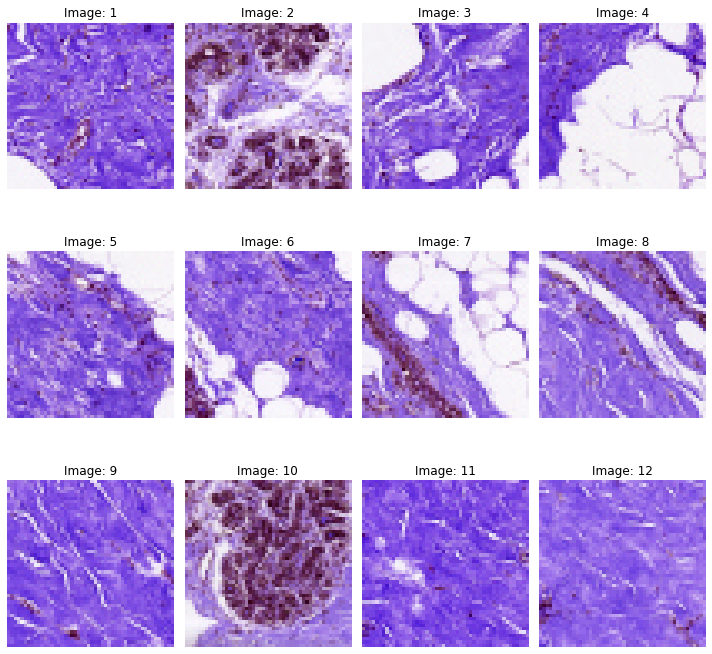

In [10]:
## Visualize few chest x-ray images

displayImages(srt_hr_normal_imgs)

In [11]:
## Load SR Images from directory

sr_normal_imgs = load_data("../input/d/mayank1101sharma/bhp-hrsr/SR_0_imgs/", ".png")

directory path:  ../input/d/mayank1101sharma/bhp-hrsr/SR_0_imgs/
directories:  ['../input/d/mayank1101sharma/bhp-hrsr/SR_0_imgs/']
list of files:  200
list of files path:  200 file path:  ../input/d/mayank1101sharma/bhp-hrsr/SR_0_imgs/SR_177.png
Files Read:  200


In [12]:
from collections import OrderedDict
# sorted(test_list, key = int)
srt_sr_normal_imgs = OrderedDict(sorted(sr_normal_imgs.items()))

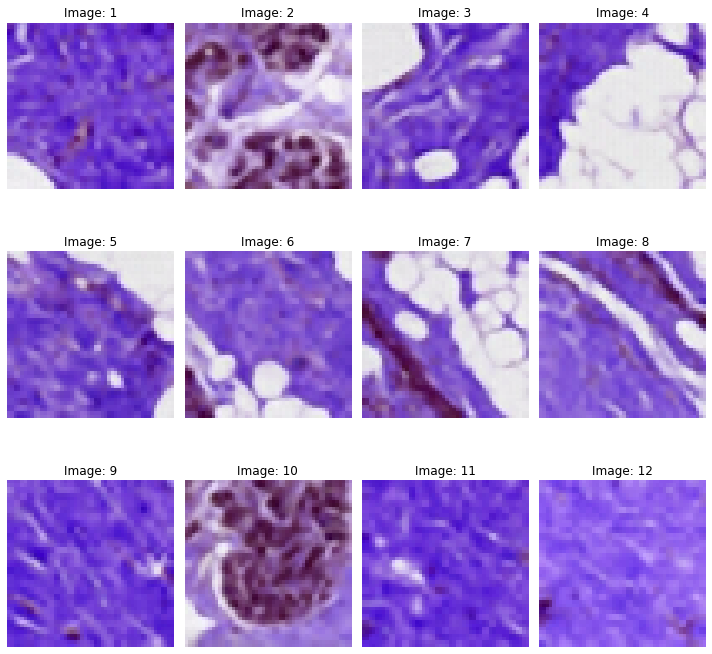

In [13]:
## Visualize few chest x-ray images

displayImages(srt_sr_normal_imgs)

In [14]:
espcn_bhp_metric = {}
espcn_bhp_metric["normal_img"] = {}
espcn_bhp_metric["diseased_img"] = {}
espcn_bhp_metric["mannwhitneyu"] = {}

## Metric Calculation for Normal Images

## Computing SSIM

In [15]:
## Compute SSIM for single image

ans = sewar.full_ref.ssim(srt_sr_normal_imgs[2],srt_hr_normal_imgs[2])[0]
print(ans)

0.8295148579203548


In [16]:
ssim_normal_arr = []
for i in range(1,201):
    ssim_normal_arr.append(sewar.full_ref.ssim(srt_sr_normal_imgs[2],srt_hr_normal_imgs[2])[0])
    
## Display Results for starting 10 images

print(ssim_normal_arr[:10])

[0.8295148579203548, 0.8295148579203548, 0.8295148579203548, 0.8295148579203548, 0.8295148579203548, 0.8295148579203548, 0.8295148579203548, 0.8295148579203548, 0.8295148579203548, 0.8295148579203548]


In [17]:
ssim_normal_mean, ssim_normal_std = np.mean(ssim_normal_arr), np.std(ssim_normal_arr)
espcn_bhp_metric["normal_img"]["ssim"] = ssim_normal_arr
print(ssim_normal_mean, ssim_normal_std)

0.8295148579203548 0.0


In [18]:
# def displayResults(img_arr1, img_arr2,ssim_arr, metric, dim=(1, 3), figsize=(15, 5)):    
#     width=8
#     height=8
#     rows = 5
#     cols = 5
#     axes=[]

#     fig=plt.figure(figsize=(10,10))

#     for i in range(rows * cols):
#         plt.figure(figsize=figsize)

#         plt.subplot(dim[0], dim[1], 1)
#         plt.imshow(img_arr1[i+1], interpolation='nearest', cmap='gray')
#         plt.title(f"Super Resolution Image {i+1}")
#         plt.axis('off')

#         plt.subplot(dim[0], dim[1], 2)
#         plt.imshow(img_arr2[i+1], interpolation='nearest', cmap='gray')
#         plt.title(f"Origial Image {i+1}")
#         plt.axis('off')
        
#         plt.subplot(dim[0], dim[1], 3)
#         plt.text(0.5, 0.5,f"{metric} {ssim_arr[i]}")
#         plt.axis('off')
        
#     fig.tight_layout()    
#     plt.show()

In [19]:
# displayResults(srt_sr_imgs, srt_hr_imgs, res_arr, "SSIM")

## Mean Absolute Error

In [20]:
def MAE(true_img, pred_img):
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric

In [21]:
print(MAE(srt_sr_normal_imgs[11], srt_hr_normal_imgs[11]))

0.0002666666666666667


In [22]:
mae_normal_arr=[]
for i in range(1, 201):
    mae_normal_arr.append(MAE(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
print(mae_normal_arr[:10])

[0.0002666666666666667, 0.0006666666666666666, 0.0008, 0.0012, 0.0006666666666666666, 0.0021333333333333334, 0.0009333333333333333, 0.0009333333333333333, 0.0, 0.0005333333333333334]


In [23]:
mae_normal_mean, mae_normal_std = np.mean(mae_normal_arr), np.std(mae_normal_arr)
espcn_bhp_metric["normal_img"]["mae"] = mae_normal_arr
print("mean: ", mae_normal_mean, " std: ", mae_normal_std)

mean:  0.000712  std:  0.0005769559967815763


## Mean Percentage Error

In [24]:
def MPE(true_img, pred_img):
    
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric * 100

In [25]:
print(MPE(srt_sr_normal_imgs[5], srt_hr_normal_imgs[5]))

0.06666666666666667


In [26]:
mpe_normal_arr=[]
for i in range(1, 201):
    mpe_normal_arr.append(MPE(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
print(mpe_normal_arr[:10])

[0.02666666666666667, 0.06666666666666667, 0.08, 0.12, 0.06666666666666667, 0.21333333333333335, 0.09333333333333334, 0.09333333333333334, 0.0, 0.05333333333333334]


In [27]:
mpe_normal_mean, mpe_normal_std = np.mean(mpe_normal_arr), np.std(mpe_normal_arr)
espcn_bhp_metric["normal_img"]["mpe"] = mpe_normal_arr
print("mean: ", mpe_normal_mean, " std: ", mpe_normal_std)

mean:  0.07119999999999999  std:  0.05769559967815763


## Mean Square Error

In [28]:
ans = sewar.full_ref.mse(srt_sr_normal_imgs[21], srt_hr_normal_imgs[21])
print(ans, type(ans))

803.3413333333333 <class 'numpy.float64'>


In [29]:
mse_normal_arr = []
for i in range(1,201):
    mse_normal_arr.append(sewar.full_ref.mse(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images

print(mse_normal_arr[:10])

[908.8353333333333, 668.7929333333333, 764.6768, 420.96866666666665, 710.3438666666667, 512.698, 731.2676, 571.5478666666667, 800.0881333333333, 660.9117333333334]


In [30]:
mse_normal_mean, mse_normal_std = np.mean(mse_normal_arr), np.std(mse_normal_arr)
espcn_bhp_metric["normal_img"]["mse"] = mse_normal_arr
print("mean: ", mse_normal_mean, " std: ", mse_normal_std)

mean:  699.5786646666666  std:  273.93206254580275


## Root Mean Square Error

In [31]:
ans = sewar.full_ref.rmse(srt_sr_normal_imgs[2], srt_hr_normal_imgs[2])
print(ans, type(ans))

25.861031173047476 <class 'numpy.float64'>


In [32]:
rmse_normal_arr = []
for i in range(1,201):
    rmse_normal_arr.append(sewar.full_ref.rmse(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images

print(rmse_normal_arr[:10])

[30.146895915389585, 25.861031173047476, 27.652790094310554, 20.51752096786224, 26.65227695088483, 22.64283551148133, 27.041959988136956, 23.90706729539754, 28.285829196495783, 25.708203619337805]


In [33]:
rmse_normal_mean, rmse_normal_std = np.mean(rmse_normal_arr), np.std(rmse_normal_arr)
espcn_bhp_metric["normal_img"]["rmse"] = rmse_normal_arr
print("mean: ", rmse_normal_mean, " std: ", rmse_normal_std)

mean:  25.961887650424178  std:  5.055596334105333


## PSNR

In [34]:
ans = sewar.full_ref.psnr(srt_sr_normal_imgs[2], srt_hr_normal_imgs[2])
print(ans, type(ans))

19.87788685298423 <class 'numpy.float64'>


In [35]:
psnr_normal_arr = []
for i in range(1,201):
    psnr_normal_arr.append(sewar.full_ref.psnr(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images
print(psnr_normal_arr[:10])

[18.54595157847137, 19.87788685298423, 19.296024468066435, 21.888305890231727, 19.61611725890322, 21.032187375774193, 19.49004029140547, 20.560277528055906, 19.099425317357998, 19.92936898789146]


In [36]:
psnr_normal_mean, psnr_normal_std = np.mean(psnr_normal_arr), np.std(psnr_normal_arr)
espcn_bhp_metric["normal_img"]["psnr"] = psnr_normal_arr
print("mean: ", psnr_normal_mean, " std: ", psnr_normal_std)

mean:  20.009855584545253  std:  1.70738193596467


## Multi-Scale Structural Similarity Index (MS-SSIM)

In [37]:
ans = sewar.full_ref.msssim(srt_sr_normal_imgs[5], srt_hr_normal_imgs[5]).real
print(ans, type(ans))

0.940986653694245 <class 'numpy.float64'>


In [38]:
msssim_normal_arr = []
for i in range(1,201):
    msssim_normal_arr.append(sewar.full_ref.msssim(srt_sr_normal_imgs[5], srt_hr_normal_imgs[5]).real)
    
## Display Results for starting 10 images
print(msssim_normal_arr[:10])

[0.940986653694245, 0.940986653694245, 0.940986653694245, 0.940986653694245, 0.940986653694245, 0.940986653694245, 0.940986653694245, 0.940986653694245, 0.940986653694245, 0.940986653694245]


In [39]:
msssim_normal_mean, msssim_normal_std = np.mean(msssim_normal_arr), np.std(msssim_normal_arr)
espcn_bhp_metric["normal_img"]["msssim"] = msssim_normal_arr
print("mean: ", msssim_normal_mean,  " std: ", msssim_normal_std)

mean:  0.9409866536942448  std:  1.1102230246251565e-16


## Spatial Corelation Coefficient (SCC)

In [40]:
ans = sewar.full_ref.scc(srt_sr_normal_imgs[2], srt_hr_normal_imgs[2])
print(ans, type(ans))

0.40173933212050567 <class 'numpy.float64'>


In [41]:
scc_normal_arr = []
for i in range(1,201):
    scc_normal_arr.append(sewar.full_ref.scc(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images

print(scc_normal_arr[:10])

[0.3291380635044698, 0.40173933212050567, 0.44658077627117526, 0.48575184017266804, 0.37022966459400025, 0.4327560905302334, 0.5355154344264605, 0.4541766847910317, 0.33164955688078984, 0.4299700193063308]


In [42]:
scc_normal_mean, scc_normal_std = np.mean(scc_normal_arr), np.std(scc_normal_arr)
espcn_bhp_metric["normal_img"]["scc"] = scc_normal_arr
print("mean: ", scc_normal_mean,  " std: ", scc_normal_std)

mean:  0.40225203496962025  std:  0.09007214789974816


## Pixel Based Visual Information Fidelity (vif-p)

In [43]:
ans = sewar.full_ref.vifp(srt_sr_normal_imgs[2], srt_hr_normal_imgs[2])
print(ans, type(ans))

0.3067855302183696 <class 'numpy.float64'>


In [44]:
vifp_normal_arr = []
for i in range(1,201):
    vifp_normal_arr.append(sewar.full_ref.vifp(srt_sr_normal_imgs[i], srt_hr_normal_imgs[i]))
    
## Display Results for starting 10 images
print(vifp_normal_arr[:10])

[0.1980517513608834, 0.3067855302183696, 0.27233117587916383, 0.36893812255011255, 0.2578835228757961, 0.28775746254485485, 0.3793170721638151, 0.3091717271540949, 0.2033613851929845, 0.26314437828757636]


In [45]:
vifp_normal_mean, vifp_normal_std = np.mean(vifp_normal_arr), np.std(vifp_normal_arr)
espcn_bhp_metric["normal_img"]["vifp"] = vifp_normal_arr
print("mean: ", vifp_normal_mean,  " std: ", vifp_normal_std)

mean:  0.2758548797150903  std:  0.0529420567833585


## Metric Calculations for Diseased Images

In [46]:
## Load HR Images from directory
print(len('../input/d/mayank1101sharma/bhp-hrsr/HR_1_imgs'))
hr_pneumonia_imgs = load_data("../input/d/mayank1101sharma/bhp-hrsr/HR_1_imgs/", ".png")

46
directory path:  ../input/d/mayank1101sharma/bhp-hrsr/HR_1_imgs/
directories:  ['../input/d/mayank1101sharma/bhp-hrsr/HR_1_imgs/']
list of files:  200
list of files path:  200 file path:  ../input/d/mayank1101sharma/bhp-hrsr/HR_1_imgs/HR_7.png
Files Read:  200


In [47]:
from collections import OrderedDict
# sorted(test_list, key = int)
srt_hr_pneumonia_imgs = OrderedDict(sorted(hr_pneumonia_imgs.items()))

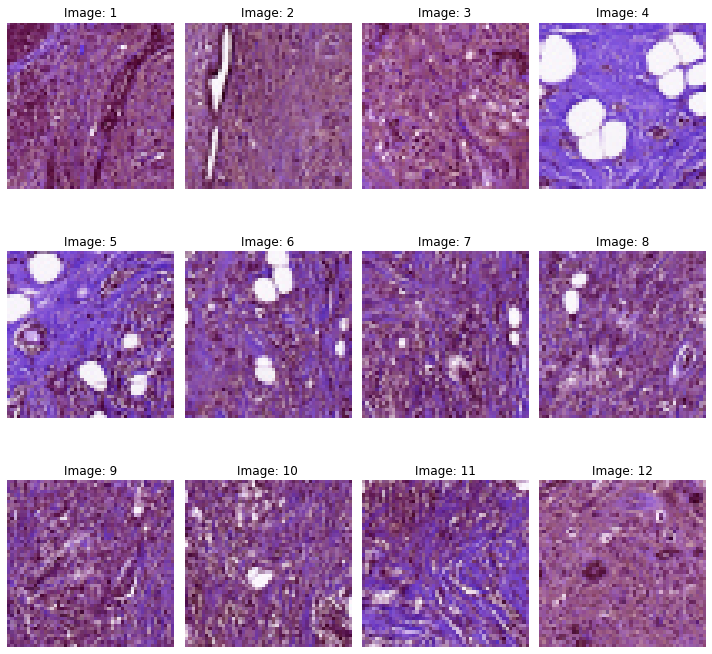

In [48]:
## Visualize few chest x-ray images

displayImages(srt_hr_pneumonia_imgs)

In [49]:
## Load SR Images from directory

sr_pneumonia_imgs = load_data("../input/d/mayank1101sharma/bhp-hrsr/SR_1_imgs/", ".png")

directory path:  ../input/d/mayank1101sharma/bhp-hrsr/SR_1_imgs/
directories:  ['../input/d/mayank1101sharma/bhp-hrsr/SR_1_imgs/']
list of files:  200
list of files path:  200 file path:  ../input/d/mayank1101sharma/bhp-hrsr/SR_1_imgs/SR_177.png
Files Read:  200


In [50]:
from collections import OrderedDict
# sorted(test_list, key = int)
srt_sr_pneumonia_imgs = OrderedDict(sorted(sr_pneumonia_imgs.items()))

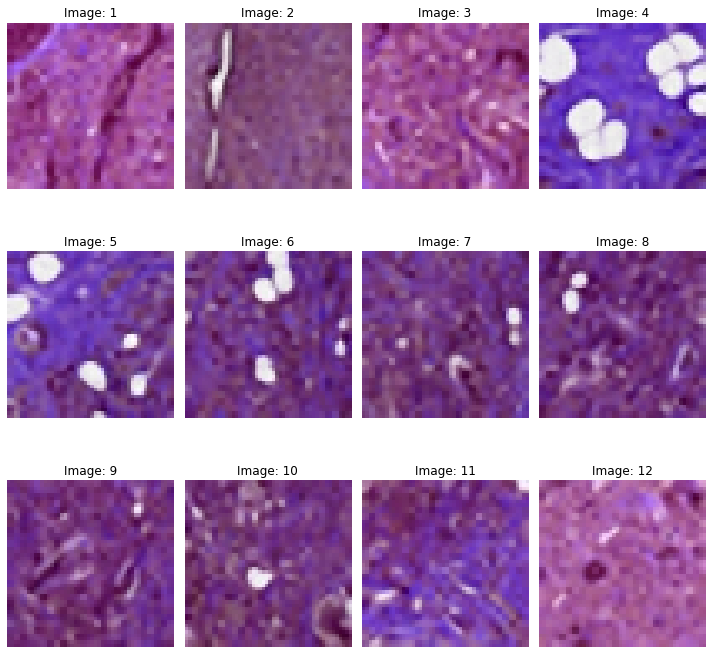

In [51]:
## Visualize few chest x-ray images

displayImages(srt_sr_pneumonia_imgs)

In [52]:
sewar.full_ref.ssim(srt_sr_pneumonia_imgs[12],srt_hr_pneumonia_imgs[12])[0]

0.6489933531218642

In [53]:
ssim_pneumonia_arr = []
for i in range(1,201):
    ssim_pneumonia_arr.append(sewar.full_ref.ssim(srt_sr_pneumonia_imgs[12],srt_hr_pneumonia_imgs[12])[0])
print(ssim_pneumonia_arr[:10])

[0.6489933531218642, 0.6489933531218642, 0.6489933531218642, 0.6489933531218642, 0.6489933531218642, 0.6489933531218642, 0.6489933531218642, 0.6489933531218642, 0.6489933531218642, 0.6489933531218642]


In [54]:
ssim_pneumonia_mean, ssim_pneumonia_std = np.mean(ssim_pneumonia_arr), np.std(ssim_pneumonia_arr)
espcn_bhp_metric["diseased_img"]["ssim"] = ssim_pneumonia_arr
print(ssim_pneumonia_mean, ssim_pneumonia_std)

0.6489933531218642 0.0


## Mean Absolute Error (MAE)

In [55]:
def MAE(true_img, pred_img):
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric

In [56]:
MAE(srt_sr_pneumonia_imgs[2],srt_hr_pneumonia_imgs[2])

0.0002666666666666667

In [57]:
mae_pneumonia_arr = []
for i in range(1,201):
    mae_pneumonia_arr.append(MAE(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(mae_pneumonia_arr[:10])

[0.0002666666666666667, 0.0002666666666666667, 0.0002666666666666667, 0.007066666666666666, 0.002533333333333333, 0.0005333333333333334, 0.0004, 0.0002666666666666667, 0.0002666666666666667, 0.0004]


In [58]:
mae_pneumonia_mean, mae_pneumonia_std = np.mean(mae_pneumonia_arr), np.std(mae_pneumonia_arr)
espcn_bhp_metric["diseased_img"]["mae"] = mae_pneumonia_arr
print(mae_pneumonia_mean, mae_pneumonia_std)

0.0007133333333333333 0.0011220417896753124


## Mean Absolute Percentage Error (MAPE)

In [59]:
def MPE(true_img, pred_img):
    
    true_img = true_img // 255.
    pred_img = pred_img // 255.
    img1 = true_img.flatten()
    img2 = pred_img.flatten()
    metric = np.mean((np.absolute(np.subtract(img1, img2))))
    return metric * 100

In [60]:
MPE(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])

0.02666666666666667

In [61]:
mpe_pneumonia_arr = []
for i in range(1,201):
    mpe_pneumonia_arr.append(MPE(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(mpe_pneumonia_arr[:10])

[0.02666666666666667, 0.02666666666666667, 0.02666666666666667, 0.7066666666666667, 0.2533333333333333, 0.05333333333333334, 0.04, 0.02666666666666667, 0.02666666666666667, 0.04]


In [62]:
mpe_pneumonia_mean, mpe_pneumonia_std = np.mean(mpe_pneumonia_arr), np.std(mpe_pneumonia_arr)
espcn_bhp_metric["diseased_img"]["mpe"] = mpe_pneumonia_arr
print(mpe_pneumonia_mean, mpe_pneumonia_std)

0.07133333333333333 0.11220417896753122


## Mean Square Error (MSE)

In [63]:
ans = sewar.full_ref.mse(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

442.0113333333333 <class 'numpy.float64'>


In [64]:
mse_pneumonia_arr = []
for i in range(1,201):
    mse_pneumonia_arr.append(sewar.full_ref.mse(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(mse_pneumonia_arr[:10])

[770.7054666666667, 384.15546666666665, 442.0113333333333, 840.8972, 737.5341333333333, 799.9368, 705.8606666666667, 1024.6796, 767.4758666666667, 861.24]


In [65]:
mse_pneumonia_mean, mse_pneumonia_std = np.mean(mse_pneumonia_arr), np.std(mse_pneumonia_arr)
espcn_bhp_metric["diseased_img"]["mse"] = mse_pneumonia_arr
print(mse_pneumonia_mean, mse_pneumonia_std)

731.1954033333334 244.2163479640835


## Root Mean Square Error (RMSE)

In [66]:
ans = sewar.full_ref.rmse(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

21.024065575747553 <class 'numpy.float64'>


In [67]:
rmse_pneumonia_arr = []
for i in range(1,201):
    rmse_pneumonia_arr.append(sewar.full_ref.rmse(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(rmse_pneumonia_arr[:10])

[27.761582567761995, 19.59988435340032, 21.024065575747553, 28.998227532040644, 27.15757966633502, 28.283153996681488, 26.56803844220846, 32.01061698874297, 27.70335479083114, 29.346890806352896]


In [68]:
rmse_pneumonia_mean, rmse_pneumonia_std = np.mean(rmse_pneumonia_arr), np.std(rmse_pneumonia_arr)
espcn_bhp_metric["diseased_img"]["rmse"] = rmse_pneumonia_arr
print(rmse_pneumonia_mean, rmse_pneumonia_std)

26.659317581107835 4.525062368958887


## PSNR

In [69]:
ans = sewar.full_ref.psnr(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

21.676469559056358 <class 'numpy.float64'>


In [70]:
psnr_pneumonia_arr = []
for i in range(1,201):
    psnr_pneumonia_arr.append(sewar.full_ref.psnr(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(psnr_pneumonia_arr[:10])

[19.261919213904683, 22.28573343137434, 21.676469559056358, 18.883374544892504, 19.45298236454615, 19.100246844953244, 19.64361378895102, 18.02492270797446, 19.280156329249174, 18.779561685879695]


In [71]:
psnr_pneumonia_mean, psnr_pneumonia_std = np.mean(psnr_pneumonia_arr), np.std(psnr_pneumonia_arr)
espcn_bhp_metric["diseased_img"]["psnr"] = psnr_pneumonia_arr
print(psnr_pneumonia_mean, psnr_pneumonia_std)

19.742270048557526 1.5073067413970023


## Multi-Scale Structure Similarity Index MS-SSIM

In [72]:
ans = sewar.full_ref.msssim(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3]).real
print(ans, type(ans))

0.9008204161437818 <class 'numpy.float64'>


In [73]:
msssim_pneumonia_arr = []
for i in range(1,201):
    msssim_pneumonia_arr.append(sewar.full_ref.msssim(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]).real)
print(msssim_pneumonia_arr[:10])

[0.8994015942881405, 0.9164565360030245, 0.9008204161437818, 0.960559141933355, 0.9336800346568392, 0.9273326113156886, 0.9117948752247874, 0.9205697457676623, 0.906001020519198, 0.9031860071272513]


In [74]:
msssim_pneumonia_mean, msssim_pneumonia_std = np.mean(msssim_pneumonia_arr), np.std(msssim_pneumonia_arr)
espcn_bhp_metric["diseased_img"]["msssim"] = msssim_pneumonia_arr
print(msssim_pneumonia_mean, msssim_pneumonia_std)

0.898050771413902 0.030836733060910095


## Spatial Corelation Coefficient (SCC)

In [75]:
ans = sewar.full_ref.scc(srt_sr_pneumonia_imgs[3],srt_hr_pneumonia_imgs[3])
print(ans, type(ans))

0.33588861410097026 <class 'numpy.float64'>


In [76]:
scc_pneumonia_arr = []
for i in range(1,201):
    scc_pneumonia_arr.append(sewar.full_ref.scc(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(scc_pneumonia_arr[:10])

[0.31443707644623287, 0.3974714059407026, 0.33588861410097026, 0.49770793163463223, 0.4115688751580192, 0.39670728176991443, 0.3285203734641817, 0.3612712379416577, 0.3111826356534179, 0.32716376122257024]


In [77]:
scc_pneumonia_mean, scc_pneumonia_std = np.mean(scc_pneumonia_arr), np.std(scc_pneumonia_arr)
espcn_bhp_metric["diseased_img"]["scc"] = scc_pneumonia_arr
print(scc_pneumonia_mean, scc_pneumonia_std)

0.340156065507704 0.0814131079140896


## Pixel Based Visual Information Fidelity (vif-p)

In [78]:
ans = sewar.full_ref.vifp(srt_sr_pneumonia_imgs[10],srt_hr_pneumonia_imgs[10])
print(ans, type(ans))

0.23076452603544606 <class 'numpy.float64'>


In [79]:
vifp_pneumonia_arr = []
for i in range(1,201):
    vifp_pneumonia_arr.append(sewar.full_ref.vifp(srt_sr_pneumonia_imgs[i],srt_hr_pneumonia_imgs[i]))
print(vifp_pneumonia_arr[:10])

[0.19650400870682452, 0.2635803052953903, 0.18326386289500354, 0.3569063588258068, 0.27513494128414934, 0.28675153270307147, 0.2261580564698359, 0.24350766943766922, 0.20672648284945952, 0.23076452603544606]


In [80]:
vifp_pneumonia_mean, vifp_pneumonia_std = np.mean(vifp_pneumonia_arr), np.std(vifp_pneumonia_arr)
espcn_bhp_metric["diseased_img"]["vifp"] = vifp_pneumonia_arr
print(vifp_pneumonia_mean, vifp_pneumonia_std)

0.2103029977032199 0.06005269833344337


## Compute Mann Whitney U Test

In [81]:
from scipy.stats import mannwhitneyu
res = {}
for k1, k2 in zip(espcn_bhp_metric["normal_img"].keys(),espcn_bhp_metric["diseased_img"].keys()):
    res[k1] = {}
    res[k1]["stat"], res[k1]["p_value"] = mannwhitneyu(espcn_bhp_metric["normal_img"][k1], espcn_bhp_metric["diseased_img"][k2])
    espcn_bhp_metric["mannwhitneyu"] = res
print(espcn_bhp_metric["mannwhitneyu"])

{'ssim': {'stat': 0.0, 'p_value': 4.591299197872198e-89}, 'mae': {'stat': 14737.5, 'p_value': 1.4948551938885525e-06}, 'mpe': {'stat': 14737.5, 'p_value': 1.4948551938885525e-06}, 'mse': {'stat': 18075.0, 'p_value': 0.0479976447291849}, 'rmse': {'stat': 18075.0, 'p_value': 0.0479976447291849}, 'psnr': {'stat': 18075.0, 'p_value': 0.0479976447291849}, 'msssim': {'stat': 3800.0, 'p_value': 5.029207501824424e-51}, 'scc': {'stat': 10083.0, 'p_value': 4.859423902943544e-18}, 'vifp': {'stat': 7358.0, 'p_value': 3.9549875145280036e-28}}


## Save the results

In [82]:
import pickle

with open('./espcn_bhp_metric.pkl', 'wb') as f:
    pickle.dump(espcn_bhp_metric, f)

In [83]:
import json

with open('./espcn_bhp_metric.json', 'w') as f:
    json.dump(espcn_bhp_metric, f)